In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


In [2]:
column_names = ['Year','Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime',
           'UniqueCarrier','FlightNum','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime',
           'ArrDelay','DepDelay','Origin','Dest','Distance','TaxiIn','TaxiOut','Cancelled',
           'CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
           'LateAircraftDelay','Delayed']


In [3]:
df_1997 = pd.read_csv('1997_header.csv', header = 0, names = column_names)
df_1997.head()
df_1997.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39549 entries, 0 to 39548
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               39549 non-null  int64  
 1   Month              39549 non-null  int64  
 2   DayofMonth         39549 non-null  int64  
 3   DayOfWeek          39549 non-null  int64  
 4   DepTime            39549 non-null  int64  
 5   CRSDepTime         39549 non-null  int64  
 6   ArrTime            39549 non-null  int64  
 7   CRSArrTime         39549 non-null  int64  
 8   UniqueCarrier      39549 non-null  object 
 9   FlightNum          39549 non-null  int64  
 10  TailNum            39549 non-null  object 
 11  ActualElapsedTime  39549 non-null  int64  
 12  CRSElapsedTime     39549 non-null  int64  
 13  AirTime            39549 non-null  int64  
 14  ArrDelay           39549 non-null  int64  
 15  DepDelay           39549 non-null  int64  
 16  Origin             395

In [4]:
df_2002 = pd.read_csv('sample_2002_encoding.csv', encoding = 'windows-1252', header = None, names = column_names)
df_2002.head()
df_2002.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               40000 non-null  int64  
 1   Month              40000 non-null  int64  
 2   DayofMonth         40000 non-null  int64  
 3   DayOfWeek          40000 non-null  int64  
 4   DepTime            40000 non-null  object 
 5   CRSDepTime         40000 non-null  int64  
 6   ArrTime            40000 non-null  object 
 7   CRSArrTime         40000 non-null  int64  
 8   UniqueCarrier      40000 non-null  object 
 9   FlightNum          40000 non-null  int64  
 10  TailNum            40000 non-null  object 
 11  ActualElapsedTime  40000 non-null  object 
 12  CRSElapsedTime     40000 non-null  int64  
 13  AirTime            40000 non-null  object 
 14  ArrDelay           40000 non-null  object 
 15  DepDelay           40000 non-null  object 
 16  Origin             400

In [5]:
df_2006 = pd.read_csv('yekaterina_sample_2006.csv', header = None, names = column_names)
df_2006.head()
df_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               40000 non-null  int64 
 1   Month              40000 non-null  int64 
 2   DayofMonth         40000 non-null  int64 
 3   DayOfWeek          40000 non-null  int64 
 4   DepTime            40000 non-null  object
 5   CRSDepTime         40000 non-null  int64 
 6   ArrTime            40000 non-null  object
 7   CRSArrTime         40000 non-null  int64 
 8   UniqueCarrier      40000 non-null  object
 9   FlightNum          40000 non-null  int64 
 10  TailNum            40000 non-null  object
 11  ActualElapsedTime  40000 non-null  object
 12  CRSElapsedTime     40000 non-null  int64 
 13  AirTime            40000 non-null  object
 14  ArrDelay           40000 non-null  object
 15  DepDelay           40000 non-null  object
 16  Origin             40000 non-null  objec

In [6]:
column_names_29 = ['Year','Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime',
           'UniqueCarrier','FlightNum','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime',
           'ArrDelay','DepDelay','Origin','Dest','Distance','TaxiIn','TaxiOut','Cancelled',
           'CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay',
           'LateAircraftDelay']
df_2007 = pd.read_csv('2007_sample_header.csv', header=0)
df_2007.columns = column_names_29
df_2007.head()



,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,2,27,2,929.0,935,1225.0,1245,WN,2314,...,3,5,0,NaN,0,0,0,0,0,0
1,2007,7,5,4,1326.0,1325,2152.0,2200,HA,22,...,5,15,0,NaN,0,0,0,0,0,0
2,2007,8,27,1,1535.0,1540,1713.0,1714,NW,1465,...,9,27,0,NaN,0,0,0,0,0,0
3,2007,12,30,7,807.0,810,1006.0,1035,AA,1138,...,6,8,0,NaN,0,0,0,0,0,0
4,2007,10,18,4,827.0,825,1049.0,1042,US,1814,...,5,10,0,NaN,0,0,0,0,0,0


In [7]:
# Create the 'Delayed' column based on the conditions
df_2007['Delayed'] = np.where(
    (df_2007['ArrDelay'] <= 0) & (df_2007['DepDelay'] <= 0), 
    'N',  # If both ArrDelay and DepDelay are <= 0, put 'N'
    'Y'   # Otherwise, put 'Y'
)

# Check the first few rows to ensure it worked
df_2007.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
0,2007,2,27,2,929.0,935,1225.0,1245,WN,2314,...,5,0,NaN,0,0,0,0,0,0,N
1,2007,7,5,4,1326.0,1325,2152.0,2200,HA,22,...,15,0,NaN,0,0,0,0,0,0,Y
2,2007,8,27,1,1535.0,1540,1713.0,1714,NW,1465,...,27,0,NaN,0,0,0,0,0,0,N
3,2007,12,30,7,807.0,810,1006.0,1035,AA,1138,...,8,0,NaN,0,0,0,0,0,0,N
4,2007,10,18,4,827.0,825,1049.0,1042,US,1814,...,10,0,NaN,0,0,0,0,0,0,Y


In [8]:
dfs = [df_1997, df_2002, df_2006, df_2007]

# Combine them into one DataFrame (vertically)
df_combined = pd.concat(dfs, ignore_index=True,axis=0)


# Perfoming EDA

In [9]:
# Step 1: Check the shape of the dataframe (rows and columns)
print(f"Data shape: {df_combined.shape}")

# Get information about the DataFrame (data types, non-null values)
print("\nDataFrame information:")
print(df_combined.info())

# Get descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
df_combined.describe()

Data shape: (159549, 30)

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159549 entries, 0 to 159548
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               159549 non-null  int64  
 1   Month              159549 non-null  int64  
 2   DayofMonth         159549 non-null  int64  
 3   DayOfWeek          159549 non-null  int64  
 4   DepTime            158783 non-null  object 
 5   CRSDepTime         159549 non-null  int64  
 6   ArrTime            158702 non-null  object 
 7   CRSArrTime         159549 non-null  int64  
 8   UniqueCarrier      159549 non-null  object 
 9   FlightNum          159549 non-null  int64  
 10  TailNum            159549 non-null  object 
 11  ActualElapsedTime  158702 non-null  object 
 12  CRSElapsedTime     159542 non-null  float64
 13  AirTime            158702 non-null  object 
 14  ArrDelay           158702 non-null  object 
 15  De

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,159549.000000,159549.000000,159549.000000,159549.000000,159549.000000,159549.000000,159549.000000,159542.000000,159549.000000,159549.000000,159549.000000,159549.000000,159549.000000
mean,2003.016960,5.148086,15.816320,3.925365,1334.622624,1488.691537,1697.560806,118.108949,662.574620,6.161637,15.004049,0.013444,0.001341
std,3.929613,3.812498,8.832146,1.971631,473.758858,490.456050,1720.954920,65.400545,525.939184,16.370347,10.489155,0.115167,0.036599
min,1997.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.000000,1.000000,8.000000,2.000000,930.000000,1113.000000,514.000000,72.000000,293.000000,4.000000,9.000000,0.000000,0.000000
50%,2006.000000,5.000000,16.000000,4.000000,1330.000000,1515.000000,1146.000000,100.000000,501.000000,5.000000,13.000000,0.000000,0.000000
75%,2007.000000,8.000000,23.000000,6.000000,1730.000000,1909.000000,2090.000000,147.000000,873.000000,7.000000,18.000000,0.000000,0.000000
max,2007.000000,12.000000,31.000000,7.000000,2400.000000,2400.000000,9501.000000,655.000000,4962.000000,1482.000000,386.000000,1.000000,1.000000


In [10]:
# Check for missing values
print("\nNumber of missing values per column:")
print(df_combined.isnull().sum())


Number of missing values per column:
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                 766
CRSDepTime                0
ArrTime                 847
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ActualElapsedTime       847
CRSElapsedTime            7
AirTime                 847
ArrDelay                847
DepDelay                766
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode     158119
Diverted                  0
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
Delayed                   0
dtype: int64


In [11]:
# Show a sample of rows where 'Cancelled' is NaN
df_combined[df_combined['CancellationCode'].isnull()].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
0,1997,12,13,6,1231,1225,1559,1554,UA,1270,...,22,0,NaN,0,\N,\N,\N,\N,\N,Y
1,1997,12,22,1,753,750,1111,1120,UA,906,...,9,0,NaN,0,\N,\N,\N,\N,\N,Y
2,1997,12,27,6,1143,1142,1450,1446,UA,1750,...,12,0,NaN,0,\N,\N,\N,\N,\N,Y
3,1997,12,16,2,1133,1135,1438,1439,UA,1750,...,14,0,NaN,0,\N,\N,\N,\N,\N,N
4,1997,12,16,2,838,840,1201,1151,UA,1580,...,26,0,NaN,0,\N,\N,\N,\N,\N,Y


In [12]:
# Check unique values in the 'Cancelled' column
cancelled_values = df_combined['Cancelled'].value_counts()

print("Unique values in 'Cancelled' column:")
print(cancelled_values)


Unique values in 'Cancelled' column:
Cancelled
0    157404
1      2145
Name: count, dtype: int64


In [13]:
# Drop rows where the 'Cancelled' column is not 0 (i.e., cancelled flights)
df_combined = df_combined[df_combined['Cancelled'] == 0]

# Check the shape after dropping cancelled flights
print("Shape of the dataset after dropping cancelled flights:", df_combined.shape)

Shape of the dataset after dropping cancelled flights: (157404, 30)


In [14]:
print(df_combined['Year'].unique())

[1997 2002 2006 2007]


In [15]:
# Fill missing values in 'CancellationCode' with a placeholder, such as 'NoCancellation'
df_combined['CancellationCode'] = df_combined['CancellationCode'].fillna('NoCancellation')
# Check unique values in the 'Cancelled' column
cancelled_values = df_combined['Cancelled'].value_counts()

print("Unique values in 'Cancelled' column:")
print(cancelled_values)

Unique values in 'Cancelled' column:
Cancelled
0    157404
Name: count, dtype: int64


In [16]:
# Replace all occurrences of '\N' with NaN
df_combined.replace("\\N", np.nan, inplace=True)

# Check for missing values
print("\nNumber of missing values per column:")
print(df_combined.isnull().sum())


Number of missing values per column:
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                214
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      214
CRSElapsedTime           6
AirTime                214
ArrDelay               214
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                   0
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         78834
WeatherDelay         78834
NASDelay             78834
SecurityDelay        78834
LateAircraftDelay    78834
Delayed                  0
dtype: int64


/var/folders/7l/d7pjjfhs7bg0w7jqwlj8y_xw0000gp/T/ipykernel_8426/1927084903.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined.replace("\\N", np.nan, inplace=True)


In [17]:
# List of columns to drop (leakage features)
leakage_features = ['Year', 'Month','ArrDelay', 'ArrTime', 'DepDelay', 'CarrierDelay', 'WeatherDelay',
                    'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
                    'ActualElapsedTime', 'AirTime', 'TaxiIn', 'TaxiOut', 'Cancelled','CancellationCode', 'Diverted']

# Drop these columns from df_combined
df_combined.drop(columns=leakage_features, inplace=True)

# Check if columns are dropped
print(f"Columns after dropping leakage features: {df_combined.columns.tolist()}")


Columns after dropping leakage features: ['DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'CRSElapsedTime', 'Origin', 'Dest', 'Distance', 'Delayed']


In [18]:
# Check for missing values
print("\nNumber of missing values per column:")
print(df_combined.isnull().sum())


Number of missing values per column:
DayofMonth        0
DayOfWeek         0
DepTime           0
CRSDepTime        0
CRSArrTime        0
UniqueCarrier     0
FlightNum         0
TailNum           0
CRSElapsedTime    6
Origin            0
Dest              0
Distance          0
Delayed           0
dtype: int64


In [19]:
df_combined.dropna(inplace=True)
print("Total NaN values after cleaning:", df_combined.isna().sum().sum())

Total NaN values after cleaning: 0


In [20]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157398 entries, 0 to 159548
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DayofMonth      157398 non-null  int64  
 1   DayOfWeek       157398 non-null  int64  
 2   DepTime         157398 non-null  object 
 3   CRSDepTime      157398 non-null  int64  
 4   CRSArrTime      157398 non-null  int64  
 5   UniqueCarrier   157398 non-null  object 
 6   FlightNum       157398 non-null  int64  
 7   TailNum         157398 non-null  object 
 8   CRSElapsedTime  157398 non-null  float64
 9   Origin          157398 non-null  object 
 10  Dest            157398 non-null  object 
 11  Distance        157398 non-null  int64  
 12  Delayed         157398 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 16.8+ MB


# VISUALISATIONS

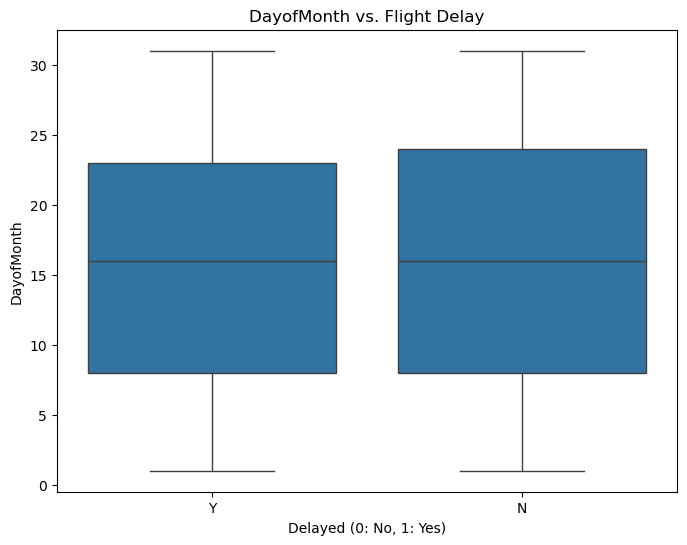

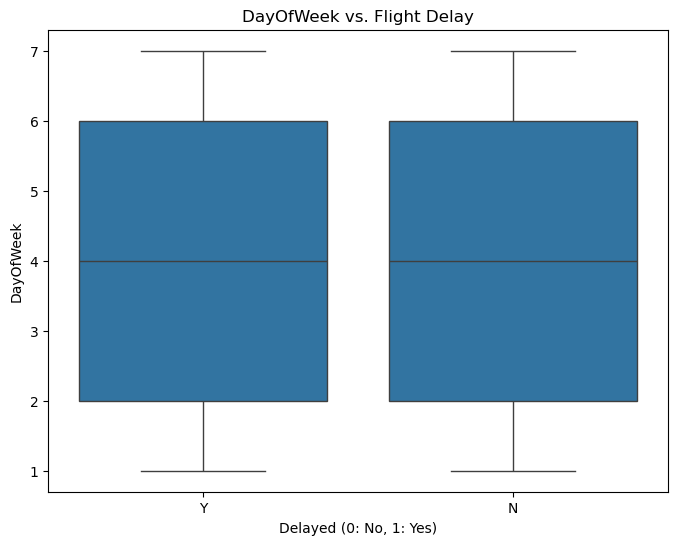

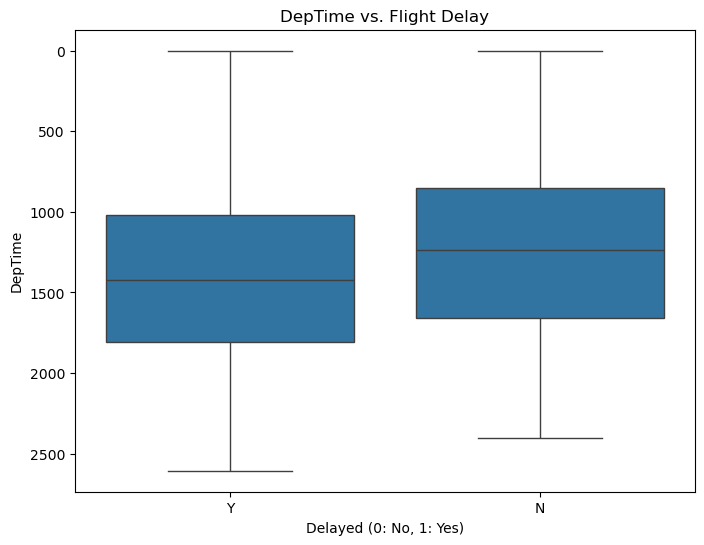

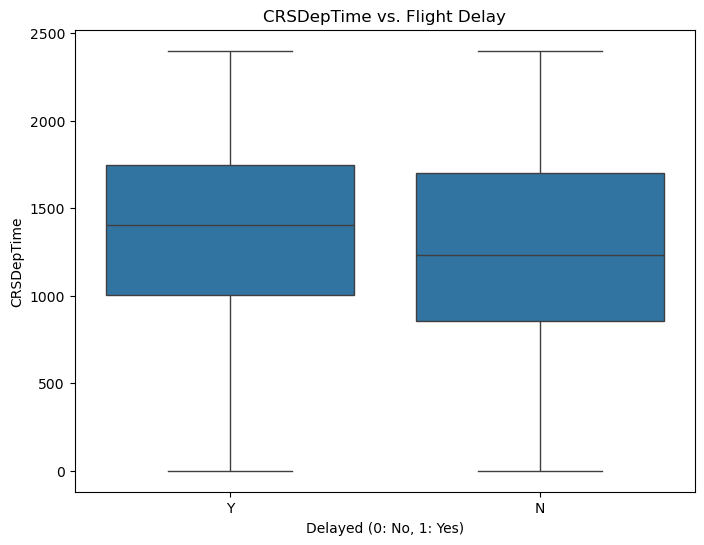

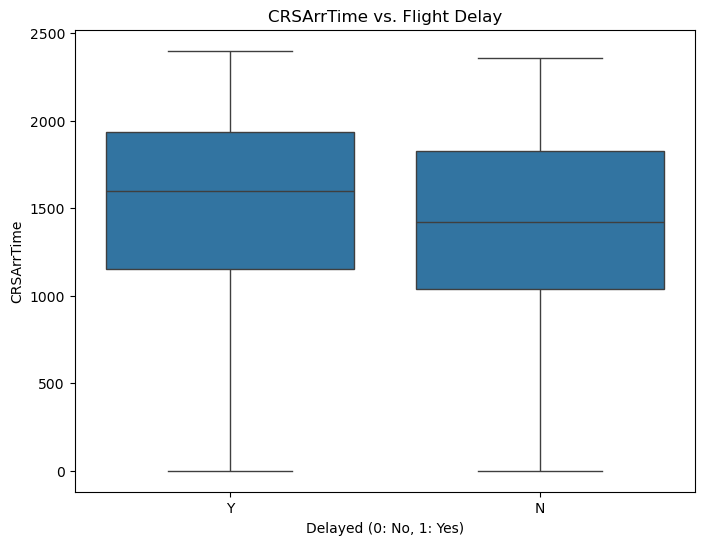

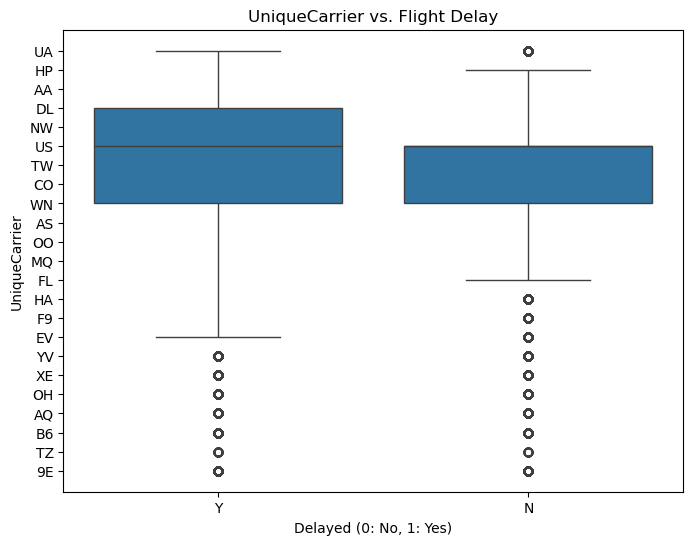

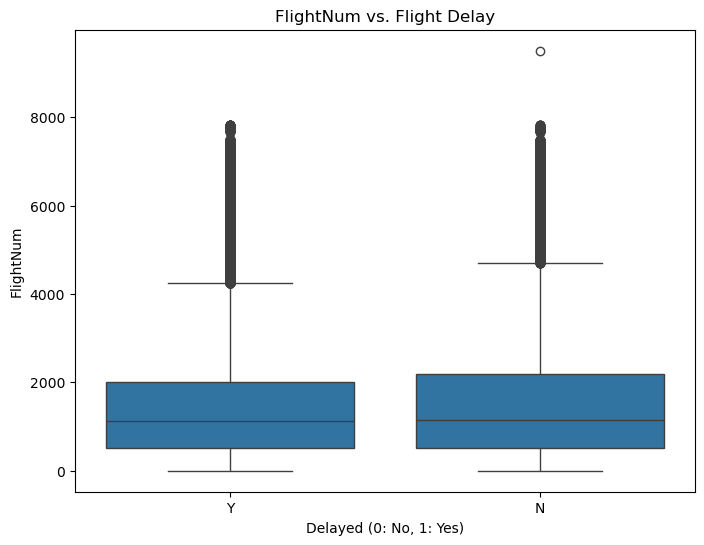

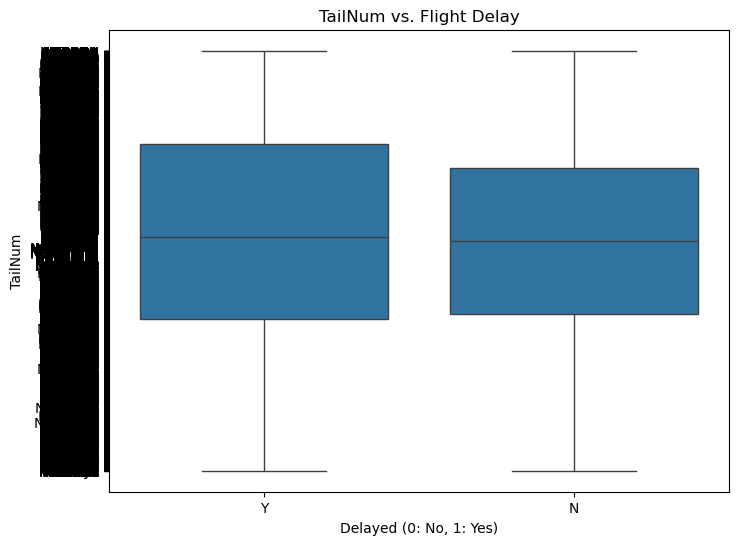

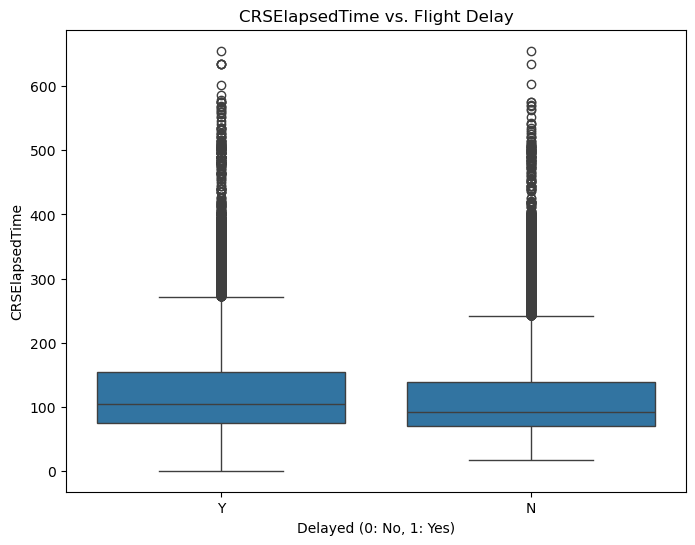

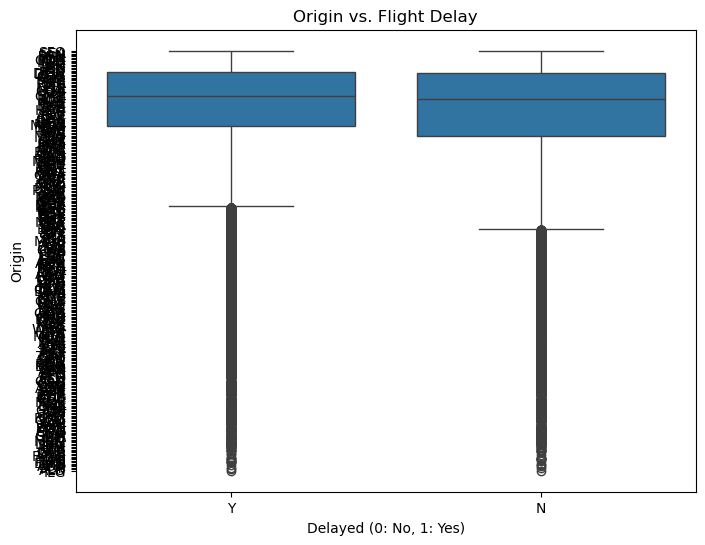

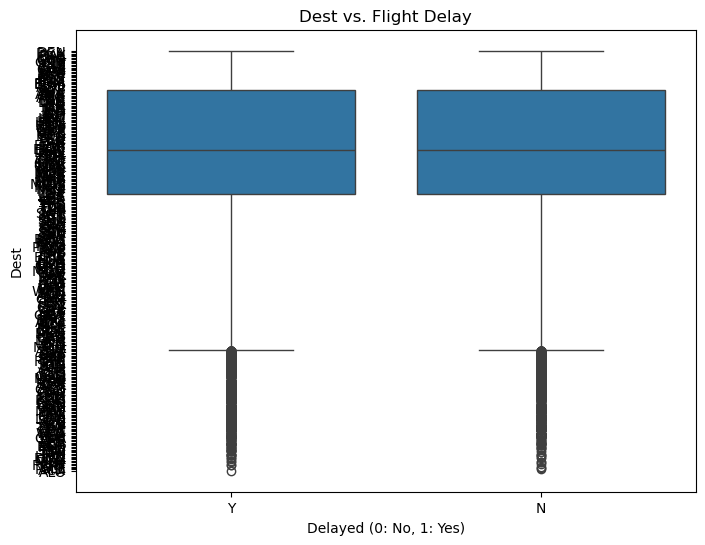

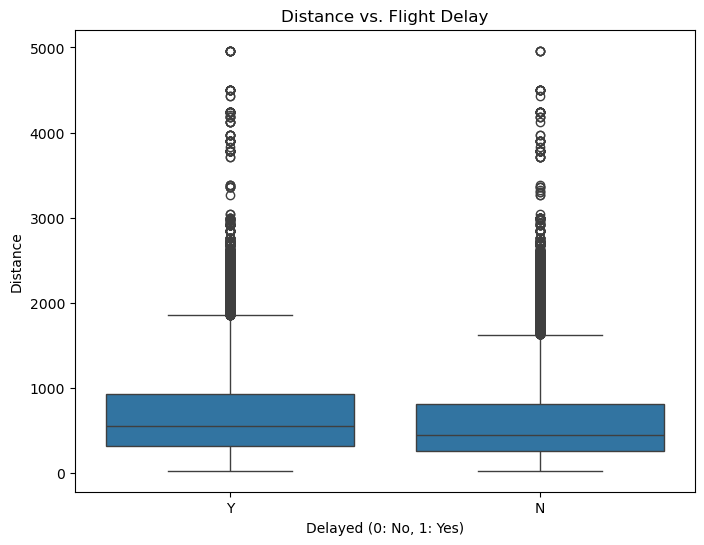

In [21]:
numeric_cols_excluding_target = [col for col in df_combined.columns if col != 'Delayed']

for col in numeric_cols_excluding_target:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Delayed', y=col, data=df_combined)
    plt.title(f'{col} vs. Flight Delay')
    plt.xlabel('Delayed (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.show()

In [22]:
# Map 'Y' to 1 and 'N' to 0 in the 'Delayed' column
df_combined['Delayed'] = df_combined['Delayed'].map({'Y': 1, 'N': 0})

# Check the value counts of the updated 'Delayed' column
print("\nValue counts for the 'Delayed' target variable:")
print(df_combined['Delayed'].value_counts())

# Verify the data type of the updated column
print("\nData type of the 'Delayed' column:")
print(df_combined['Delayed'].dtype)


Value counts for the 'Delayed' target variable:
Delayed
1    85287
0    72111
Name: count, dtype: int64

Data type of the 'Delayed' column:
int64


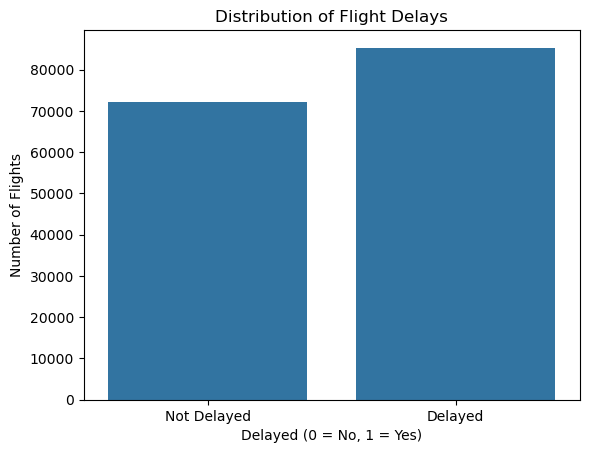

In [23]:
# Plot the distribution
sns.countplot(x='Delayed', data=df_combined)

# Add labels and title
plt.title('Distribution of Flight Delays')
plt.xlabel('Delayed (0 = No, 1 = Yes)')
plt.ylabel('Number of Flights')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])

# Show the plot
plt.show()

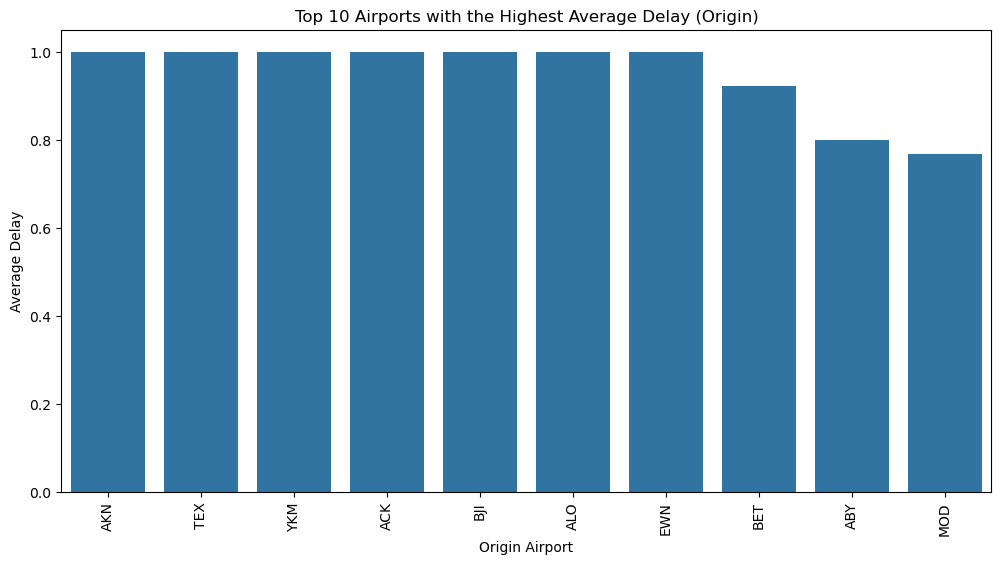

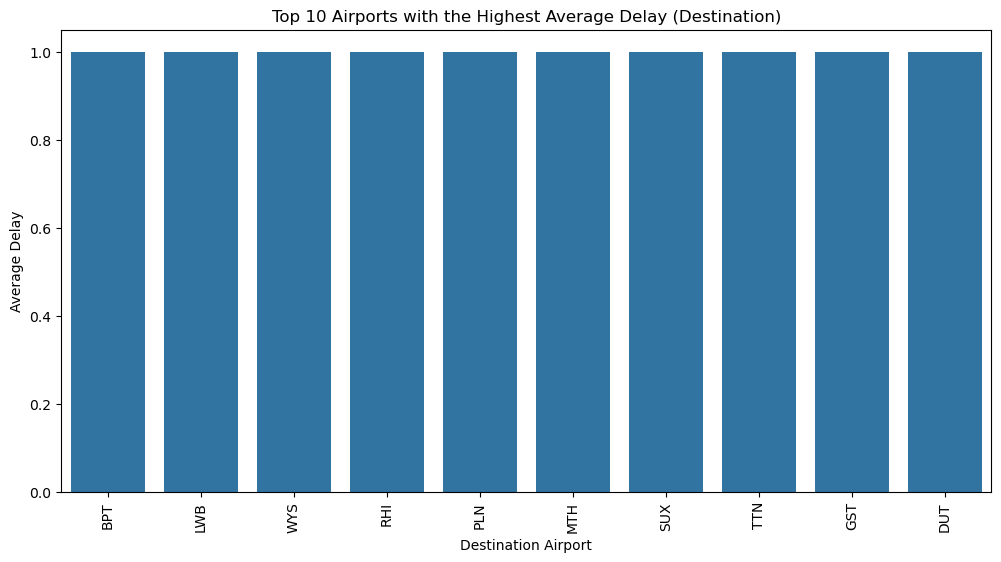

In [24]:
#Flight Delays by Origin and Destination
# Limit to top 10 airports with the highest average delay
top_n = 10

# Origin airport delay
origin_delay = df_combined.groupby('Origin')['Delayed'].mean().sort_values(ascending=False).head(top_n)
plt.figure(figsize=(12, 6))
sns.barplot(x=origin_delay.index, y=origin_delay.values)
plt.title(f'Top {top_n} Airports with the Highest Average Delay (Origin)')
plt.xlabel('Origin Airport')
plt.ylabel('Average Delay')
plt.xticks(rotation=90)
plt.show()

# Destination airport delay
dest_delay = df_combined.groupby('Dest')['Delayed'].mean().sort_values(ascending=False).head(top_n)
plt.figure(figsize=(12, 6))
sns.barplot(x=dest_delay.index, y=dest_delay.values)
plt.title(f'Top {top_n} Airports with the Highest Average Delay (Destination)')
plt.xlabel('Destination Airport')
plt.ylabel('Average Delay')
plt.xticks(rotation=90)
plt.show()


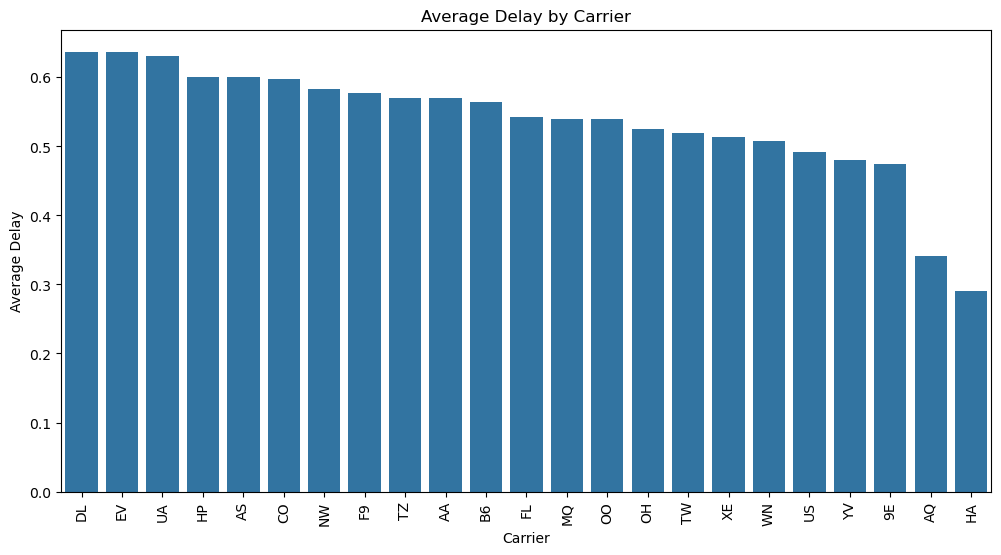

In [25]:
carrier_delay = df_combined.groupby('UniqueCarrier')['Delayed'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=carrier_delay.index, y=carrier_delay.values)
plt.title('Average Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Delay')
plt.xticks(rotation=90)
plt.show()

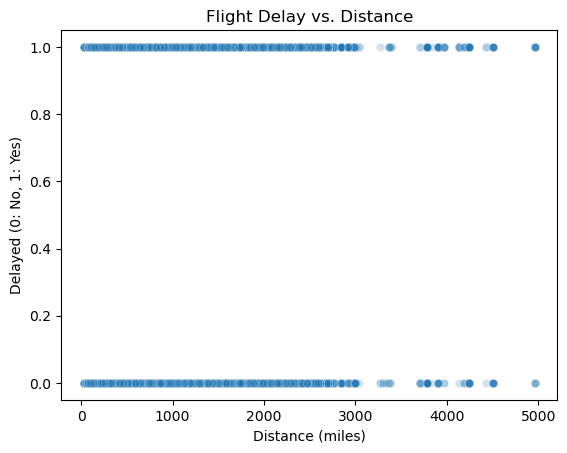

In [26]:
sns.scatterplot(x='Distance', y='Delayed', data=df_combined, alpha=0.2)
plt.title('Flight Delay vs. Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Delayed (0: No, 1: Yes)')
plt.show()

# Binning

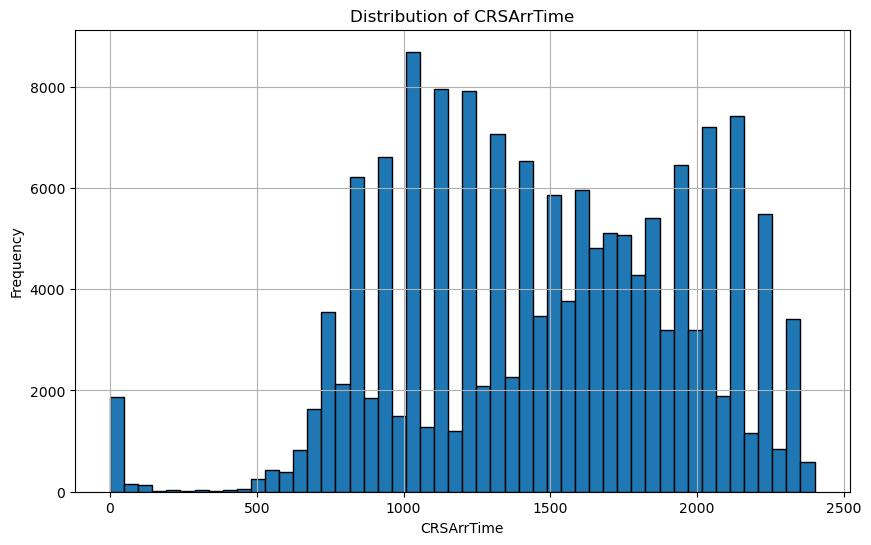

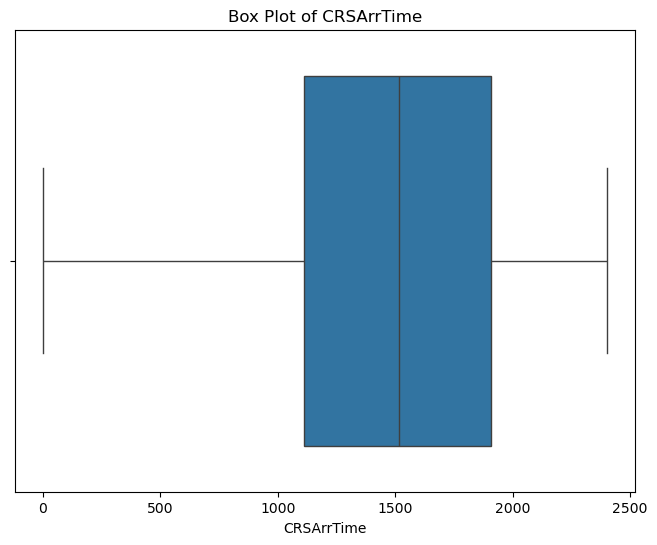


Descriptive Statistics for CRSArrTime:
count    157398.000000
mean       1488.331878
std         490.676580
min           0.000000
25%        1113.000000
50%        1515.000000
75%        1909.000000
max        2400.000000
Name: CRSArrTime, dtype: float64


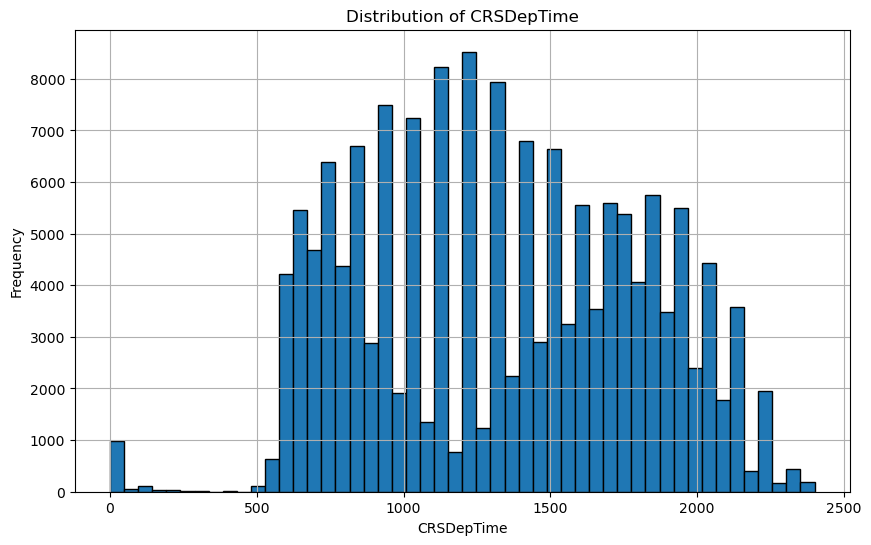

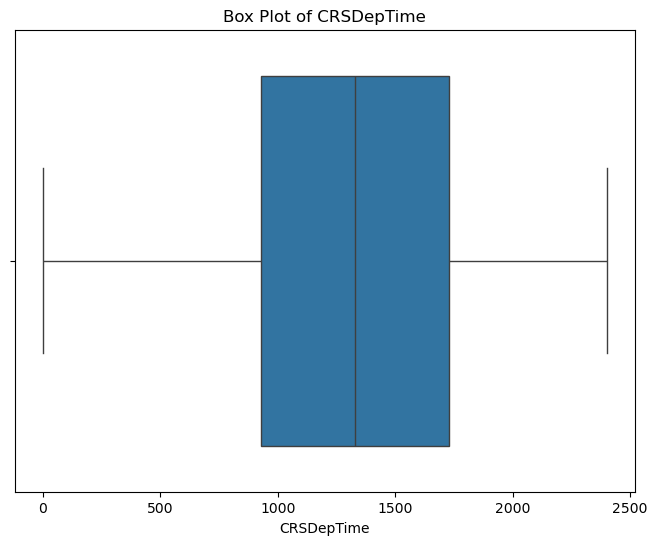


Descriptive Statistics for CRSDepTime:
count    157398.000000
mean       1334.259470
std         473.979367
min           0.000000
25%         930.000000
50%        1330.000000
75%        1730.000000
max        2400.000000
Name: CRSDepTime, dtype: float64


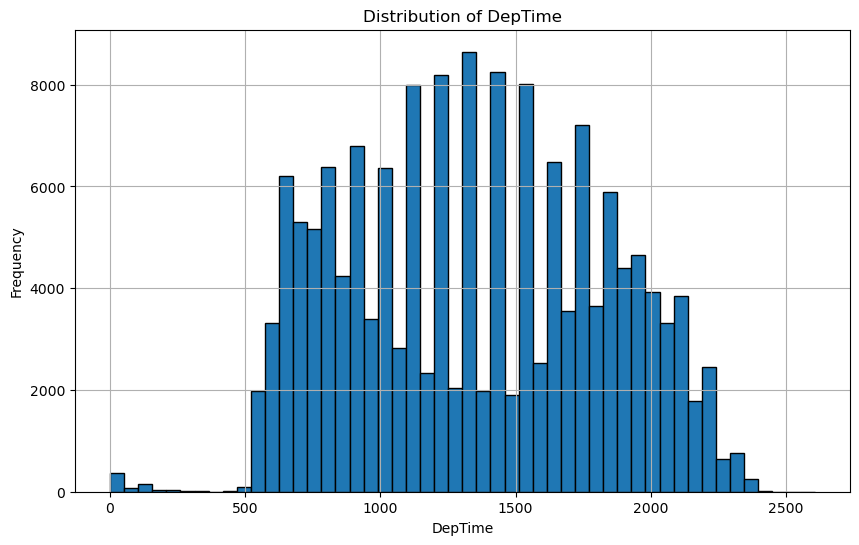

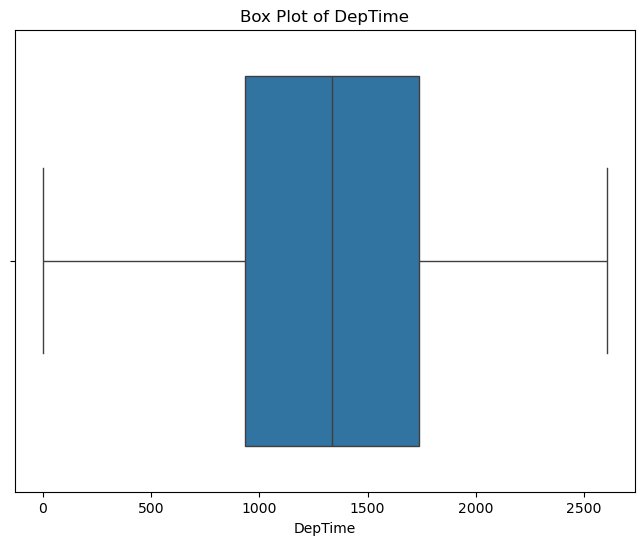


Descriptive Statistics for DepTime:
count    157398.000000
mean       1348.344814
std         475.825577
min           1.000000
25%         934.000000
50%        1336.000000
75%        1740.000000
max        2605.000000
Name: DepTime, dtype: float64


In [27]:
columns_to_plot = ['CRSArrTime', 'CRSDepTime', 'DepTime']

for col in columns_to_plot:
    # Clean the column and convert to numeric
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')
    df_combined.dropna(subset=[col], inplace=True)

    # --- Histogram ---
    plt.figure(figsize=(10, 6))
    plt.hist(df_combined[col], bins=50, edgecolor='black')  # Adjust 'bins' as needed
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # --- Box Plot ---
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_combined[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

    # --- Descriptive Statistics ---
    print(f"\nDescriptive Statistics for {col}:")
    print(df_combined[col].describe())

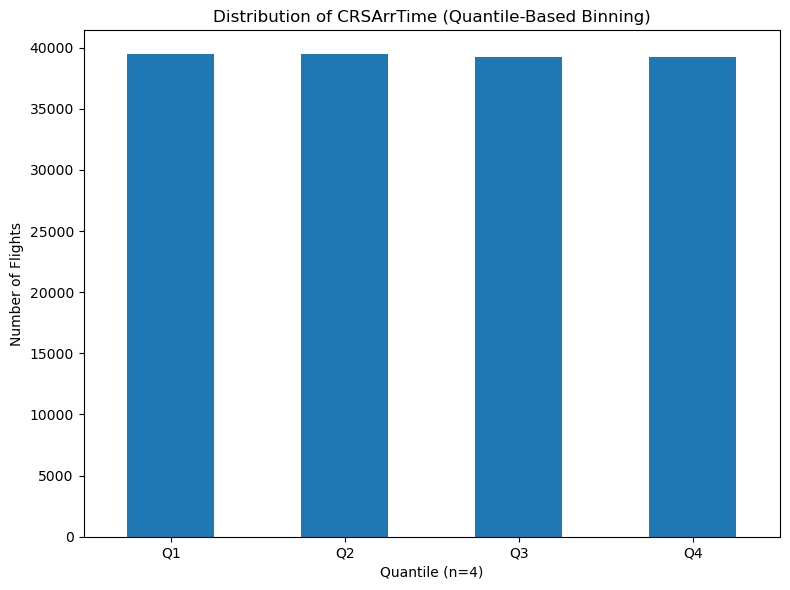


Distribution of Quantile-Binned CRSArrTime:
CRSArrTime_binned_quantile
Q1    39444
Q2    39446
Q3    39265
Q4    39243
Name: count, dtype: int64


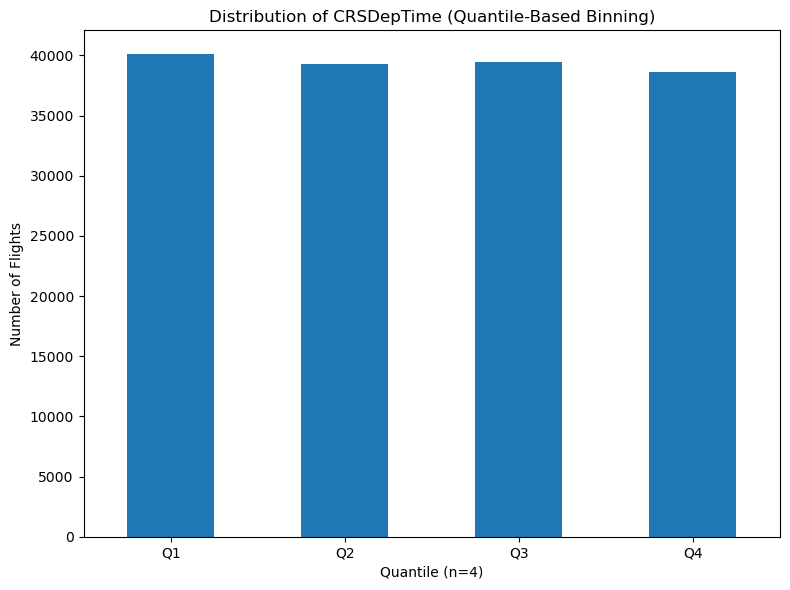


Distribution of Quantile-Binned CRSDepTime:
CRSDepTime_binned_quantile
Q1    40076
Q2    39288
Q3    39458
Q4    38576
Name: count, dtype: int64


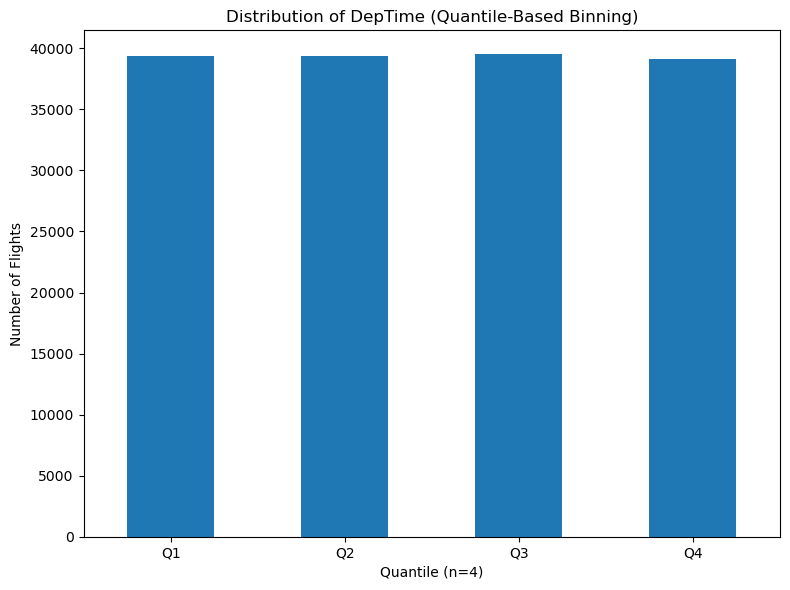


Distribution of Quantile-Binned DepTime:
DepTime_binned_quantile
Q1    39376
Q2    39389
Q3    39501
Q4    39132
Name: count, dtype: int64


In [28]:
columns_to_bin = ['CRSArrTime', 'CRSDepTime','DepTime']
num_quantiles = 4  # You can adjust the number of quantiles as needed
quantile_labels = [f'Q{i+1}' for i in range(num_quantiles)]

for col in columns_to_bin:
    # Create the new binned column name for quantile binning
    binned_col_name = f'{col}_binned_quantile'

    # Clean the column and convert to numeric
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')
    df_combined.dropna(subset=[col], inplace=True)

    # Perform quantile-based binning
    df_combined[binned_col_name] = pd.qcut(df_combined[col], q=num_quantiles, labels=quantile_labels, duplicates='drop')

    # Plot the distribution of the quantile-binned column
    plt.figure(figsize=(8, 6))
    df_combined[binned_col_name].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Distribution of {col} (Quantile-Based Binning)')
    plt.xlabel(f'Quantile (n={num_quantiles})')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Print value counts for the quantile-binned column
    print(f"\nDistribution of Quantile-Binned {col}:")
    print(df_combined[binned_col_name].value_counts().sort_index())

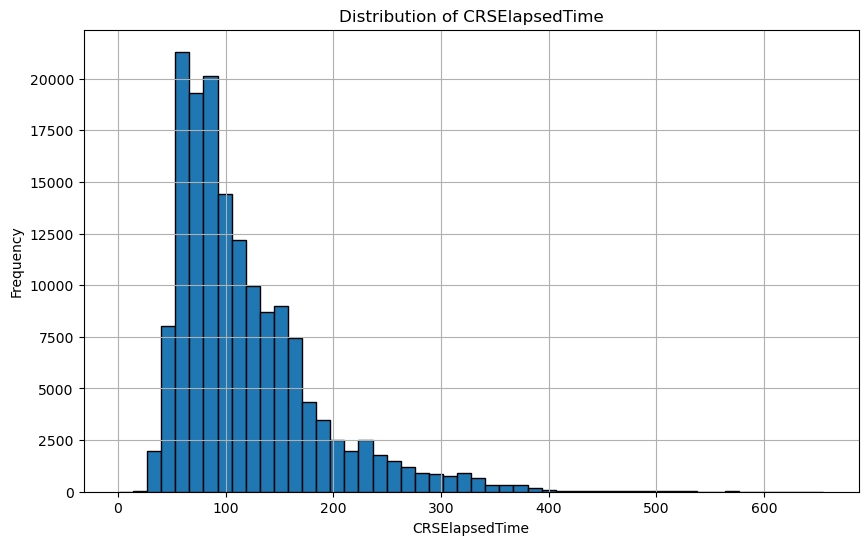

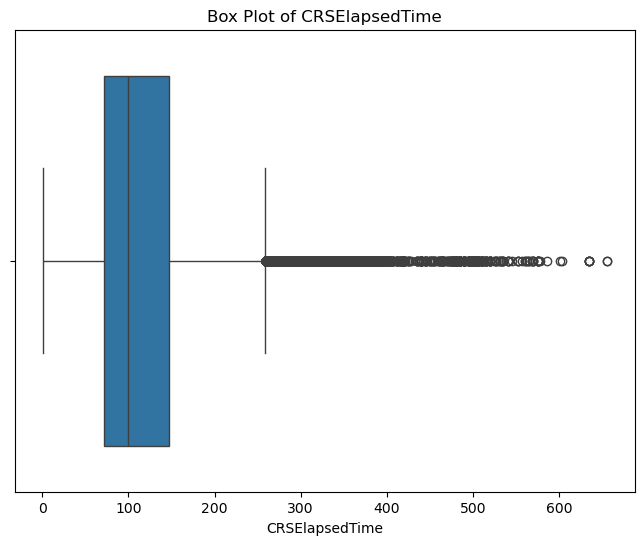


Descriptive Statistics for CRSElapsedTime:
count    157398.000000
mean        118.326834
std          65.523622
min           1.000000
25%          72.000000
50%         100.000000
75%         147.000000
max         655.000000
Name: CRSElapsedTime, dtype: float64


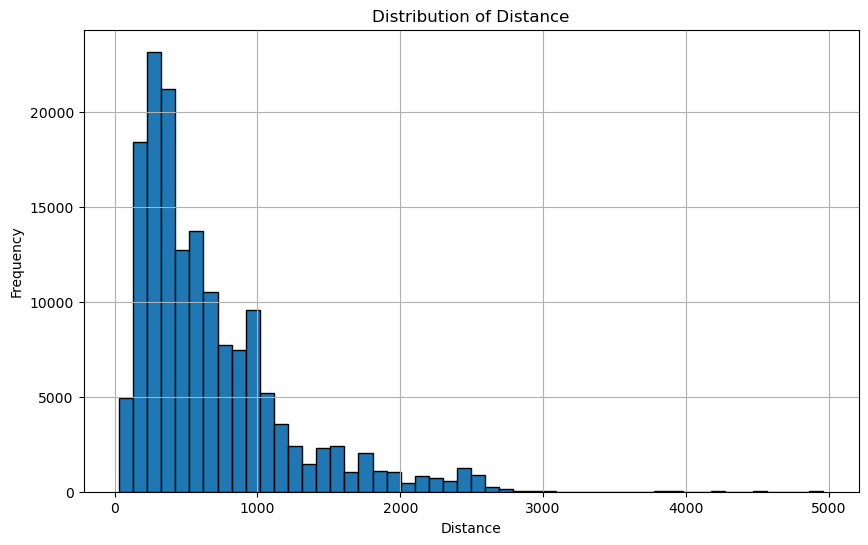

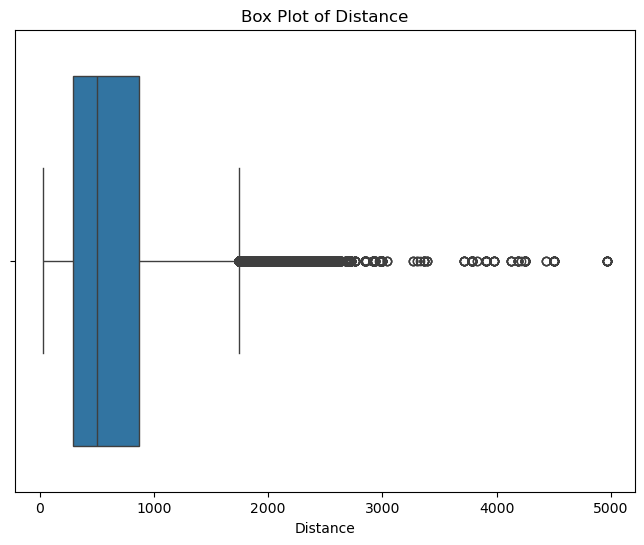


Descriptive Statistics for Distance:
count    157398.000000
mean        664.829591
std         527.108205
min          30.000000
25%         293.000000
50%         503.000000
75%         874.000000
max        4962.000000
Name: Distance, dtype: float64


In [29]:
columns_to_plot = ['CRSElapsedTime', 'Distance']

for col in columns_to_plot:
    # Clean the column and convert to numeric
    df_combined[col] = pd.to_numeric(df_combined[col], errors='coerce')
    df_combined.dropna(subset=[col], inplace=True)

    # --- Histogram ---
    plt.figure(figsize=(10, 6))
    plt.hist(df_combined[col], bins=50, edgecolor='black')  # Adjust 'bins' as needed
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # --- Box Plot ---
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_combined[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

    # --- Descriptive Statistics ---
    print(f"\nDescriptive Statistics for {col}:")
    print(df_combined[col].describe())


--- Binning CRSElapsedTime ---


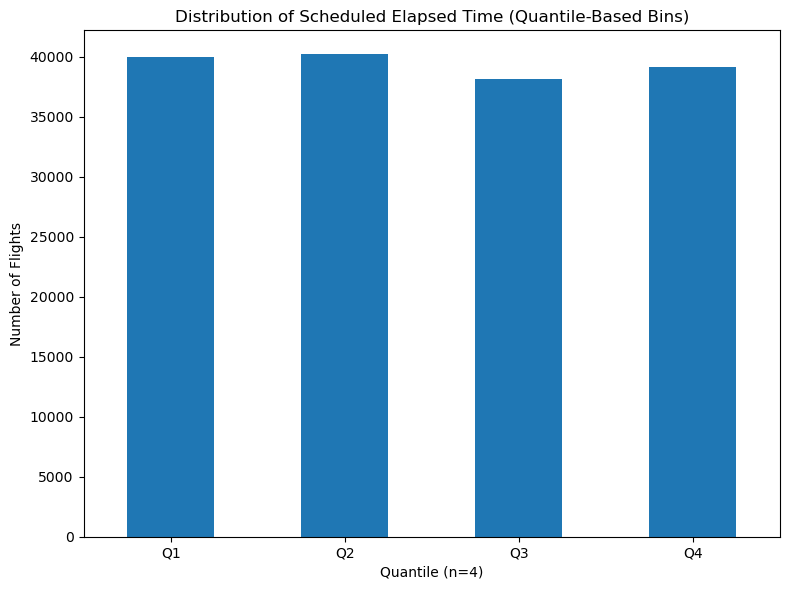


Distribution of CRSElapsedTime (Quantile-Based Bins):
CRSElapsedTime_binned_quantile
Q1    39952
Q2    40177
Q3    38121
Q4    39148
Name: count, dtype: int64

--- Binning Distance ---


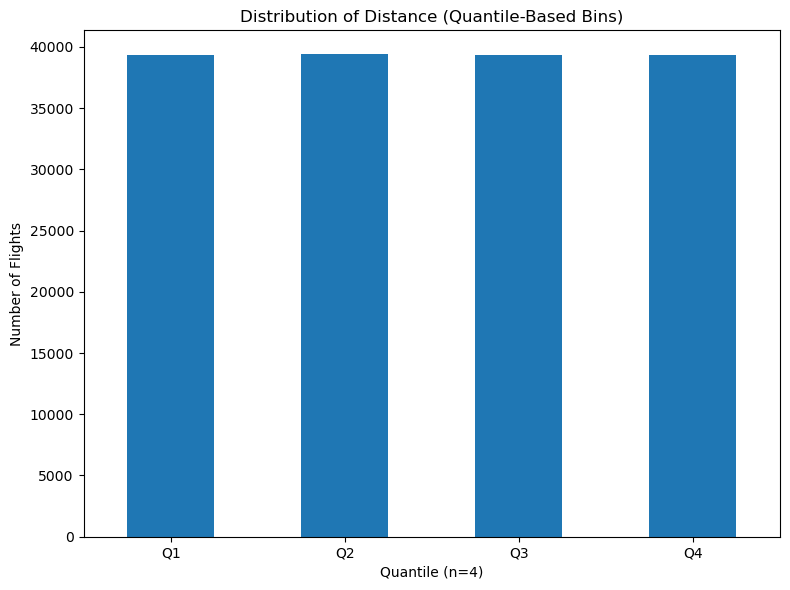


Distribution of Distance (Quantile-Based Bins):
Distance_binned_quantile
Q1    39364
Q2    39378
Q3    39337
Q4    39319
Name: count, dtype: int64


In [30]:
columns_to_bin = ['CRSElapsedTime', 'Distance']

# --- Handling CRSElapsedTime ---
print("\n--- Binning CRSElapsedTime ---")
df_combined['CRSElapsedTime'] = pd.to_numeric(df_combined['CRSElapsedTime'], errors='coerce')
df_combined.dropna(subset=['CRSElapsedTime'], inplace=True)

# Quantile-based bins
num_quantiles_time = 4
quantile_labels_time = [f'Q{i+1}' for i in range(num_quantiles_time)]
df_combined['CRSElapsedTime_binned_quantile'] = pd.qcut(df_combined['CRSElapsedTime'], q=num_quantiles_time, labels=quantile_labels_time, duplicates='drop')

plt.figure(figsize=(8, 6))
df_combined['CRSElapsedTime_binned_quantile'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Scheduled Elapsed Time (Quantile-Based Bins)')
plt.xlabel(f'Quantile (n={num_quantiles_time})')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("\nDistribution of CRSElapsedTime (Quantile-Based Bins):")
print(df_combined['CRSElapsedTime_binned_quantile'].value_counts().sort_index())

# --- Handling Distance ---
print("\n--- Binning Distance ---")
df_combined['Distance'] = pd.to_numeric(df_combined['Distance'], errors='coerce')
df_combined.dropna(subset=['Distance'], inplace=True)

# Quantile-based bins for Distance
num_quantiles_distance = 4
quantile_labels_distance = [f'Q{i+1}' for i in range(num_quantiles_distance)]
df_combined['Distance_binned_quantile'] = pd.qcut(df_combined['Distance'], q=num_quantiles_distance, labels=quantile_labels_distance, duplicates='drop')

plt.figure(figsize=(8, 6))
df_combined['Distance_binned_quantile'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Distance (Quantile-Based Bins)')
plt.xlabel(f'Quantile (n={num_quantiles_distance})')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("\nDistribution of Distance (Quantile-Based Bins):")
print(df_combined['Distance_binned_quantile'].value_counts().sort_index())

# Handle Object Columns

In [31]:
print(df_combined.select_dtypes(include='object').columns)

Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest'], dtype='object')


In [32]:
for col in df_combined.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}':")
    print(df_combined[col].unique())  # show first 10 unique values


Unique values in 'UniqueCarrier':
['UA' 'HP' 'AA' 'DL' 'NW' 'US' 'TW' 'CO' 'WN' 'AS' 'OO' 'MQ' 'FL' 'HA'
 'F9' 'EV' 'YV' 'XE' 'OH' 'AQ' 'B6' 'TZ' '9E']

Unique values in 'TailNum':
['N993UA' 'N513UA' 'N7445U' ... 'N357AA' 'N819NW' 'N866DA']

Unique values in 'Origin':
['SFO' 'SEA' 'SAN' 'PHX' 'PHL' 'PDX' 'ORD' 'MSY' 'MIA' 'MCI' 'LAX' 'JFK'
 'ICT' 'IAD' 'FSD' 'DTW' 'DFW' 'CVG' 'COS' 'BUR' 'ATL' 'TPA' 'STL' 'RDU'
 'PIT' 'PBI' 'MSP' 'LGA' 'GSO' 'FLL' 'DAY' 'CMH' 'CLT' 'CLE' 'BOS' 'ALB'
 'TUL' 'SAT' 'MAF' 'LBB' 'IAH' 'HOU' 'ELP' 'AUS' 'ABQ' 'SLC' 'LIT' 'LEX'
 'LAS' 'DCA' 'DEN' 'MEM' 'MDW' 'EWR' 'BWI' 'SDF' 'SAV' 'ROA' 'RIC' 'PNS'
 'MCO' 'JAX' 'IND' 'HSV' 'CHS' 'BNA' 'PVD' 'SMF' 'SJC' 'OAK' 'ROC' 'BHM'
 'JAN' 'TLH' 'SWF' 'SRQ' 'RSW' 'MGM' 'DAB' 'AGS' 'JNU' 'BET' 'DAL' 'MDT'
 'HNL' 'RNO' 'ONT' 'OMA' 'BOI' 'ANC' 'SHV' 'SNA' 'OKC' 'HRL' 'MSO' 'ISP'
 'BRW' 'SJU' 'PWM' 'BUF' 'SYR' 'SBN' 'ORF' 'MSN' 'MBS' 'GSP' 'GRR' 'TUS'
 'DSM' 'BTR' 'MHT' 'GEG' 'MKE' 'HPN' 'EGE' 'BTV' 'BDL' 'ABE' 'SUX' 'RST'


In [33]:
# Select object-type columns (categorical columns)
categorical_columns = df_combined.select_dtypes(include=['object']).columns

# Step 1: Store the original object columns in a new DataFrame
df_objects = df_combined[categorical_columns].copy()

# Step 2: Temporarily encode the categorical columns in the copy
label_encoder = LabelEncoder()
for col in df_objects.columns:
    df_objects[col] = label_encoder.fit_transform(df_objects[col])

# Step 3: Perform the Chi-squared test on the encoded columns
chi2_values, p_values = chi2(df_objects, df_combined['Delayed'])

# Combine the results
chi2_results = pd.DataFrame({'Feature': df_objects.columns, 'Chi2': chi2_values, 'p-value': p_values})

# Display the results
print(chi2_results)

# Step 4: Keep the original df_combined as is 

         Feature         Chi2       p-value
0  UniqueCarrier  1991.560872  0.000000e+00
1        TailNum  5290.176788  0.000000e+00
2         Origin    30.398739  3.517568e-08
3           Dest  4569.312992  0.000000e+00


#All four categorical features (UniqueCarrier, TailNum, Origin, and Dest) show a statistically significant association with target variable (at a very high level of significance). A very high Chi-squared value and the near-zero p-value strongly suggest a statistically significant association between the features and the target variable.

In [34]:
unique_tailnum_count = df_combined['TailNum'].nunique()
total_rows = df_combined.shape[0]

print(f"Unique TailNum values: {unique_tailnum_count}")
print(f"Total rows in the dataset: {total_rows}")


Unique TailNum values: 8020
Total rows in the dataset: 157398


In [35]:
# Save the encodings as dictionaries
tailnum_encoding = df_combined.groupby('TailNum')['Delayed'].mean().to_dict()
unique_carrier_encoding = df_combined.groupby('UniqueCarrier')['Delayed'].mean().to_dict()

#apply target encoding to TailNum
tailnum_encoding = df_combined.groupby('TailNum')['Delayed'].mean()

df_combined['TailNum_encoded'] = df_combined['TailNum'].map(tailnum_encoding)

print(df_combined[['TailNum', 'TailNum_encoded']].head())

# Apply target encoding to UniqueCarrier
unique_carrier_encoding = df_combined.groupby('UniqueCarrier')['Delayed'].mean()
df_combined['UniqueCarrier_encoded'] = df_combined['UniqueCarrier'].map(unique_carrier_encoding)

print(df_combined[['UniqueCarrier', 'UniqueCarrier_encoded']].head())


  TailNum  TailNum_encoded
0  N993UA         1.000000
1  N513UA         0.600000
2  N7445U         0.857143
3  N7259U         0.571429
4  N7253U         0.769231
  UniqueCarrier  UniqueCarrier_encoded
0            UA                 0.6305
1            UA                 0.6305
2            UA                 0.6305
3            UA                 0.6305
4            UA                 0.6305


In [36]:
df_combined.drop(columns=['UniqueCarrier'], inplace=True)

In [37]:
# Total number of unique categories
total_origin = df_combined['Origin'].nunique()
total_dest = df_combined['Dest'].nunique()

print(f"Total unique 'Origin' categories: {total_origin}")
print(f"Total unique 'Dest' categories: {total_dest}")

# Calculate percentages
origin_percent = df_combined['Origin'].value_counts(normalize=True) * 100
dest_percent = df_combined['Dest'].value_counts(normalize=True) * 100

# Count how many are under 1%
num_origin_under_1 = (origin_percent < 1).sum()
num_dest_under_1 = (dest_percent < 1).sum()

print(f"Number of 'Origin' categories under 1%: {num_origin_under_1}")
print(f"Number of 'Dest' categories under 1%: {num_dest_under_1}")

Total unique 'Origin' categories: 298
Total unique 'Dest' categories: 300
Number of 'Origin' categories under 1%: 268
Number of 'Dest' categories under 1%: 269


In [38]:
# Save the encodings as dictionaries
origin_encoding = df_combined.groupby('Origin')['Delayed'].mean().to_dict()
dest_encoding = df_combined.groupby('Dest')['Delayed'].mean().to_dict()


# Apply target encoding to 'Origin'
origin_encoding = df_combined.groupby('Origin')['Delayed'].mean()
df_combined['Origin_encoded'] = df_combined['Origin'].map(origin_encoding)

# Apply target encoding to 'Dest'
dest_encoding = df_combined.groupby('Dest')['Delayed'].mean()
df_combined['Dest_encoded'] = df_combined['Dest'].map(dest_encoding)

# Check the first few rows of the new columns after target encoding
print("Target encoding applied to 'Origin' and 'Dest'. Here's a preview of the encoded columns:")

# Print a sample of the result
print(df_combined[['Origin', 'Origin_encoded', 'Dest', 'Dest_encoded']].head())

# print how many unique values were encoded for each column
print(f"\nUnique 'Origin' values after encoding: {df_combined['Origin_encoded'].nunique()}")
print(f"Unique 'Dest' values after encoding: {df_combined['Dest_encoded'].nunique()}")

# Drop the original 'Origin' and 'Dest' columns
df_combined.drop(columns=['Origin', 'Dest'], inplace=True)

# Print a message confirming the columns were dropped
print("Original 'Origin' and 'Dest' columns have been dropped.")

Target encoding applied to 'Origin' and 'Dest'. Here's a preview of the encoded columns:
  Origin  Origin_encoded Dest  Dest_encoded
0    SFO        0.623949  DEN      0.578195
1    SEA        0.606791  DEN      0.578195
2    SAN        0.526285  DEN      0.578195
3    SAN        0.526285  DEN      0.578195
4    SAN        0.526285  DEN      0.578195

Unique 'Origin' values after encoding: 231
Unique 'Dest' values after encoding: 229
Original 'Origin' and 'Dest' columns have been dropped.


In [39]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157398 entries, 0 to 159548
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   DayofMonth                      157398 non-null  int64   
 1   DayOfWeek                       157398 non-null  int64   
 2   DepTime                         157398 non-null  float64 
 3   CRSDepTime                      157398 non-null  int64   
 4   CRSArrTime                      157398 non-null  int64   
 5   FlightNum                       157398 non-null  int64   
 6   TailNum                         157398 non-null  object  
 7   CRSElapsedTime                  157398 non-null  float64 
 8   Distance                        157398 non-null  int64   
 9   Delayed                         157398 non-null  int64   
 10  CRSArrTime_binned_quantile      157398 non-null  category
 11  CRSDepTime_binned_quantile      157398 non-null  category
 12  DepTime

In [40]:
binned_columns = ['CRSArrTime_binned_quantile', 'CRSDepTime_binned_quantile',
                  'DepTime_binned_quantile', 'CRSElapsedTime_binned_quantile',
                  'Distance_binned_quantile']

df_combined = pd.get_dummies(df_combined, columns=binned_columns, drop_first=True)

In [41]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157398 entries, 0 to 159548
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   DayofMonth                         157398 non-null  int64  
 1   DayOfWeek                          157398 non-null  int64  
 2   DepTime                            157398 non-null  float64
 3   CRSDepTime                         157398 non-null  int64  
 4   CRSArrTime                         157398 non-null  int64  
 5   FlightNum                          157398 non-null  int64  
 6   TailNum                            157398 non-null  object 
 7   CRSElapsedTime                     157398 non-null  float64
 8   Distance                           157398 non-null  int64  
 9   Delayed                            157398 non-null  int64  
 10  TailNum_encoded                    157398 non-null  float64
 11  UniqueCarrier_encoded              157398 no

# Model Training

In [43]:
target = df_combined['Delayed']

# List of columns to use as features
feature_columns = [
    'DayofMonth',
    'DayOfWeek',
    'FlightNum',
    'UniqueCarrier_encoded',
    'Origin_encoded',
    'Dest_encoded',
    'CRSArrTime',
    'CRSDepTime',
    'DepTime',
    'CRSElapsedTime',
    'Distance'
]

# Step 1: Define features and target
X = df_combined[feature_columns]
y = target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 5: Predict
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 9563  4957]
 [ 6253 10707]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.66      0.63     14520
           1       0.68      0.63      0.66     16960

    accuracy                           0.64     31480
   macro avg       0.64      0.64      0.64     31480
weighted avg       0.65      0.64      0.64     31480



AUC Score: 0.7009


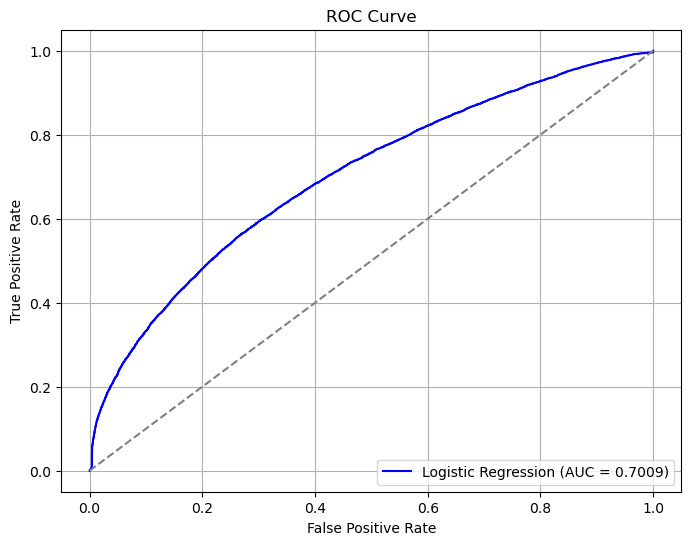

In [44]:
#Predict probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (Delayed)

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


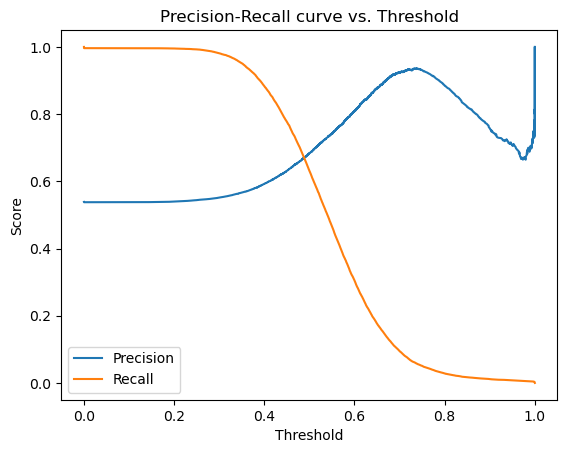

In [45]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall curve vs. Threshold')
plt.show()


# Hyperparameter tuning

In [46]:
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingGridSearchCV

# Example dataset and target
X = df_combined[feature_columns]  #  feature columns
y = df_combined['Delayed']  #  target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
    'max_iter': [100, 200, 500]
}

# Initialize the logistic regression model
model = LogisticRegression(class_weight='balanced')

# Set up HalvingGridSearchCV
search = HalvingGridSearchCV(
    estimator=model,
    param_grid=param_grid,
    factor=2,  # Halving factor
    random_state=42,
    verbose=1,
    cv=5,
    n_jobs=-1
)

# Fit the model
search.fit(X_train_scaled, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", search.best_params_)
print("Best Cross-validation Score:", search.best_score_)

# Get the best model and make predictions
best_model = search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

# Print the confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 3934
max_resources_: 125918
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 54
n_resources: 3934
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 1
n_candidates: 27
n_resources: 7868
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 2
n_candidates: 14
n_resources: 15736
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 3
n_candidates: 7
n_resources: 31472
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 4
n_candidates: 4
n_resources: 62944
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 125888
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Hyperparameters: {'C': 100, 'max_iter': 200, 'solver': 'lbfgs'}
Best Cross-validation Score: 0.6385510585057791
Confusion Matrix:
 [[ 9571  4949]
 [ 6253 

In [47]:
# Train the model with best-found parameters
model = LogisticRegression(C=100, max_iter=100, solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(y_test, y_pred))

# AUC Score
y_probs = model.predict_proba(X_test_scaled)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
print("AUC Score:", auc_score)


              precision    recall  f1-score   support

           0       0.64      0.50      0.56     14520
           1       0.64      0.76      0.69     16960

    accuracy                           0.64     31480
   macro avg       0.64      0.63      0.62     31480
weighted avg       0.64      0.64      0.63     31480

AUC Score: 0.6957707407479599


In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform

# Step 1: Create a pipeline (scaler + model)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Step 2: Define the parameter space
param_distributions = {
    'logreg__C': loguniform(1e-4, 1e4),  # Regularization strength (try values across a wide range)
    'logreg__penalty': ['l2'],           # l2 is standard
    'logreg__solver': ['liblinear', 'saga']  # Compatible with l2
}

# Step 3: Create the randomized search
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_distributions,
    n_iter=20,             # Try 20 random combinations
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',    # Metric to optimize
    random_state=42,
    verbose=1,
    n_jobs=2              # Use all available CPU cores
)

# Step 4: Fit on training data
random_search.fit(X_train, y_train)

# Step 5: Print best params and accuracy
print("Best parameters:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'logreg__C': np.float64(456.6054873446131), 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}
Best accuracy: 0.6349926454490361


In [50]:
# Use the best parameters from RandomizedSearchCV 
model = LogisticRegression(
    C=456.6054873446131,
    penalty='l2',
    solver='saga',
    max_iter=1000
)

# Fit the model
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 7191  7329]
 [ 4128 12832]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.50      0.56     14520
           1       0.64      0.76      0.69     16960

    accuracy                           0.64     31480
   macro avg       0.64      0.63      0.62     31480
weighted avg       0.64      0.64      0.63     31480



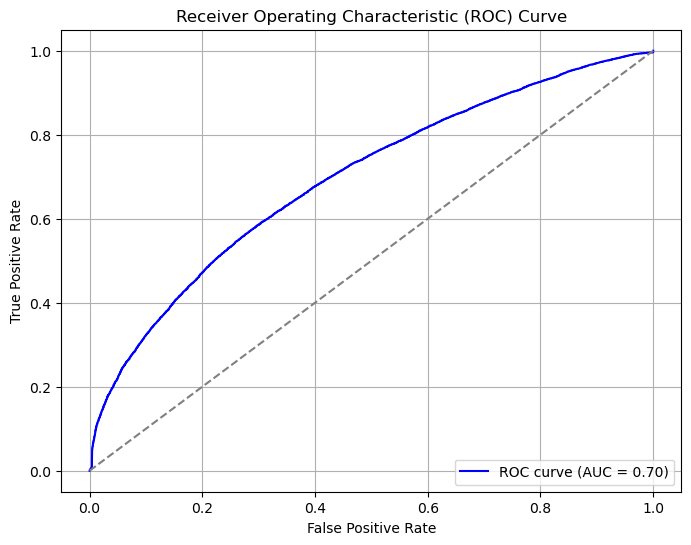

In [51]:
# Get predicted probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (Delayed)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [42]:
target = df_combined['Delayed']

# List of columns to use as features
feature_columns = [
    'DayofMonth',
    'DayOfWeek',
    'FlightNum',
    'TailNum_encoded',
    'UniqueCarrier_encoded',
    'Origin_encoded',
    'Dest_encoded',
    'CRSArrTime_binned_quantile_Q2',
    'CRSArrTime_binned_quantile_Q3',
    'CRSArrTime_binned_quantile_Q4',
    'CRSDepTime_binned_quantile_Q2',
    'CRSDepTime_binned_quantile_Q3',
    'CRSDepTime_binned_quantile_Q4',
    'DepTime_binned_quantile_Q2',
    'DepTime_binned_quantile_Q3',
    'DepTime_binned_quantile_Q4',
    'CRSElapsedTime_binned_quantile_Q2',
    'CRSElapsedTime_binned_quantile_Q3',
    'CRSElapsedTime_binned_quantile_Q4',
    'Distance_binned_quantile_Q2',
    'Distance_binned_quantile_Q3',
    'Distance_binned_quantile_Q4'
]

# Step 1: Define features and target
X = df_combined[feature_columns]
y = target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train logistic regression model
model = LogisticRegression( max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 5: Predict
y_pred = model.predict(X_test_scaled)

# Step 6: Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 7870  6650]
 [ 4512 12448]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.54      0.59     14520
           1       0.65      0.73      0.69     16960

    accuracy                           0.65     31480
   macro avg       0.64      0.64      0.64     31480
weighted avg       0.64      0.65      0.64     31480



In [43]:
new_dataset=pd.read_excel('predict_delay.xlsx')
new_dataset.info()
drop_cols = ['Year', 'Month','Delayed','DepHour','ArrDelay', 'ArrTime', 'DepDelay', 'CarrierDelay', 'WeatherDelay',
            'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
            'ActualElapsedTime', 'AirTime', 'TaxiIn', 'TaxiOut', 'Cancelled','CancellationCode', 'Diverted']
new_data = new_dataset.drop(columns=drop_cols, errors='ignore')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               0 non-null      float64
 1   Month              0 non-null      float64
 2   DayofMonth         10 non-null     int64  
 3   DayOfWeek          10 non-null     int64  
 4   DepTime            10 non-null     int64  
 5   CRSDepTime         10 non-null     int64  
 6   ArrTime            0 non-null      float64
 7   CRSArrTime         10 non-null     int64  
 8   UniqueCarrier      10 non-null     object 
 9   FlightNum          10 non-null     int64  
 10  TailNum            6 non-null      object 
 11  ActualElapsedTime  10 non-null     int64  
 12  CRSElapsedTime     10 non-null     int64  
 13  ArrDelay           0 non-null      float64
 14  DepDelay           0 non-null      float64
 15  Origin             10 non-null     object 
 16  Dest               10 non-nul

In [44]:
print(new_data.columns.tolist())

['DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'CRSElapsedTime', 'Origin', 'Dest', 'Distance']


In [45]:
new_data['Origin_encoded'] = (
    new_data['Origin']
      .map(origin_encoding)
      .fillna(origin_encoding.mean())
)
new_data['Dest_encoded'] = (
    new_data['Dest']
      .map(dest_encoding)
      .fillna(dest_encoding.mean())
)
new_data.drop(columns=['Origin','Dest'], inplace=True)

# TailNum target‑encoding
new_data['TailNum_encoded'] = (
    new_data['TailNum']
      .map(tailnum_encoding)
      .fillna(pd.Series(tailnum_encoding).mean())
)

# UniqueCarrier target‑encoding
new_data['UniqueCarrier_encoded'] = (
    new_data['UniqueCarrier']
      .map(unique_carrier_encoding)
      .fillna(pd.Series(unique_carrier_encoding).mean())
)

# Drop the original columns
new_data.drop(columns=['TailNum', 'UniqueCarrier'], inplace=True)


In [46]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DayofMonth             10 non-null     int64  
 1   DayOfWeek              10 non-null     int64  
 2   DepTime                10 non-null     int64  
 3   CRSDepTime             10 non-null     int64  
 4   CRSArrTime             10 non-null     int64  
 5   FlightNum              10 non-null     int64  
 6   CRSElapsedTime         10 non-null     int64  
 7   Distance               10 non-null     int64  
 8   Origin_encoded         10 non-null     float64
 9   Dest_encoded           10 non-null     float64
 10  TailNum_encoded        10 non-null     float64
 11  UniqueCarrier_encoded  10 non-null     float64
dtypes: float64(4), int64(8)
memory usage: 1.1 KB


In [47]:

feature_list = X_train.columns.tolist()  

#Align to  training columns:
new_data_aligned = new_data.reindex(columns=feature_list, fill_value=0)

#Scale with the same scaler used on training:
X_new_scaled = scaler.transform(new_data_aligned)

# Predict
preds = model.predict(X_new_scaled)

# Show the predictions
print(preds)


[0 0 1 0 1 1 0 1 0 0]


ROC AUC Score: 0.70


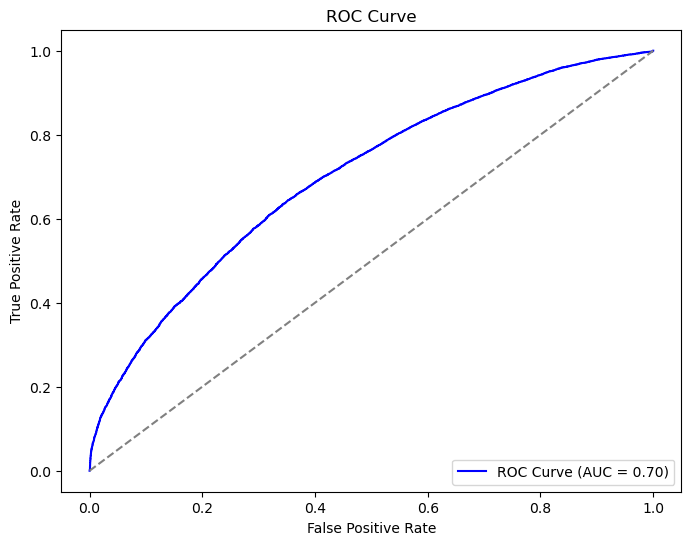

In [49]:
# Get the predicted probabilities for the positive class (1)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [49]:
# Define the simple hyperparameter grid
param_dist = {
    'C': np.logspace(-4, 4, 10),     # Regularization strength
    'penalty': ['l2'],              # Only L2 regularization
    'solver': ['liblinear'],        # 'liblinear' supports L2
}

# Initialize Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)

# Set up RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    estimator=log_reg_model, 
    param_distributions=param_dist, 
    n_iter=5,             # Only test 5 combinations to keep it light
    cv=3,                 # 3-fold cross-validation
    verbose=1, 
    random_state=42,
    n_jobs=1              # Use only 1 core
)

# Fit the model (make sure X_train_scaled and y_train are defined)
random_search_lr.fit(X_train_scaled, y_train)

# Print the best parameters and score
print(f"Best parameters: {random_search_lr.best_params_}")
print(f"Best cross-validated score: {random_search_lr.best_score_}")

# Predict and evaluate
y_pred = random_search_lr.predict(X_test_scaled)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': np.float64(1291.5496650148827)}
Best cross-validated score: 0.6618195846021305
Accuracy on test set: 0.659879288437103


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

[[ 9412  5108]
 [ 3979 12981]]
Accuracy: 0.7113405336721728


In [50]:
# Very small hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 150],         # only 3 choices
    'max_features': ['sqrt', 'log2'],       # small list
    'max_depth': [None, 10, 20],            # shallow trees only
    'min_samples_split': [2, 5],            # simple splits
    'min_samples_leaf': [1, 2],             # small leaves
    'bootstrap': [True, False],             # both options
    'criterion': ['gini']                   # just one criterion
}

# Base model
rf_model = RandomForestClassifier(random_state=42)

# Randomized search setup
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=5,         # only 5 random trials
    cv=3,             # 3‑fold CV
    verbose=1,
    random_state=42,
    n_jobs=1          # use just 1 core
)

# Fit & report
random_search.fit(X_train_scaled, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)



Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
Best CV Score: 0.7036086890458392


In [51]:
y_pred_rf = random_search.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))


[[ 9418  5102]
 [ 3946 13014]]
Test Accuracy: 0.712579415501906


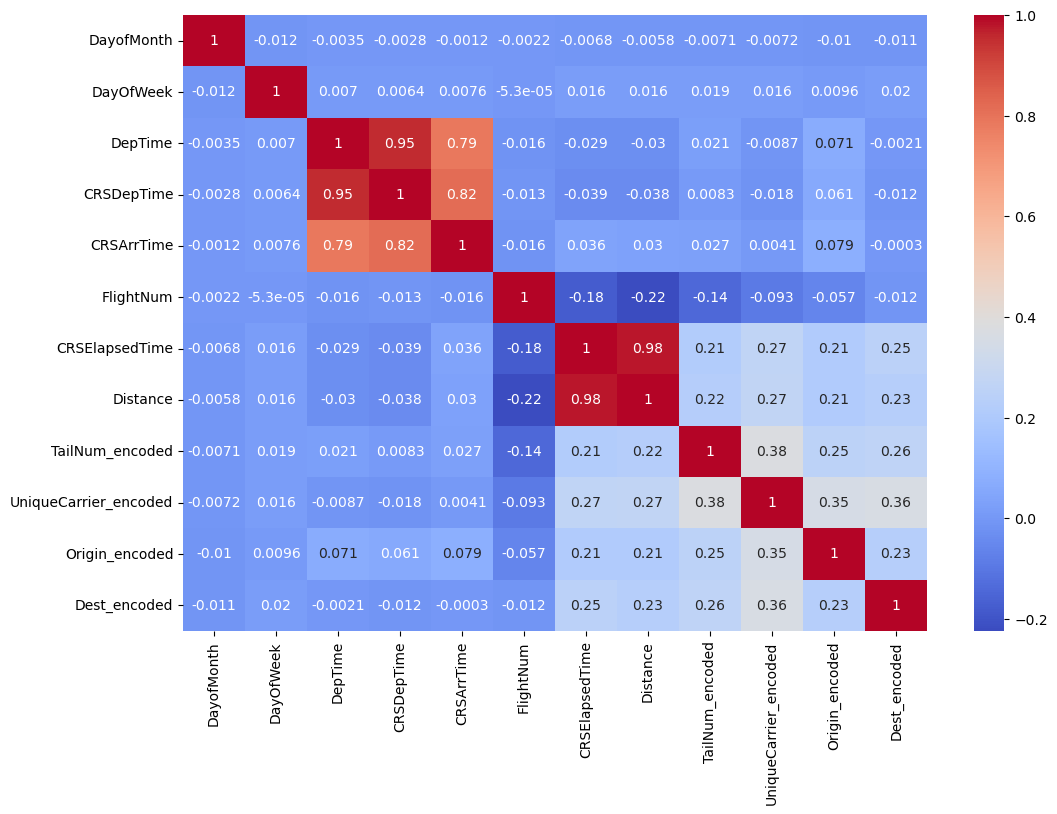

In [41]:
# Plot a correlation matrix
correlation_matrix = X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [42]:
# Define a threshold for high correlation
threshold = 0.8

# Find pairs of features with correlation above the threshold
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly correlated features:", highly_correlated_features)


Highly correlated features: {'CRSDepTime', 'CRSArrTime', 'Distance'}


In [43]:
print(df_combined.columns)

Index(['DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'CRSArrTime',
       'FlightNum', 'CRSElapsedTime', 'Distance', 'Delayed', 'TailNum_encoded',
       'UniqueCarrier_encoded', 'Origin_encoded', 'Dest_encoded'],
      dtype='object')


In [46]:
# Drop the highly correlated features from the DataFrame
df_combined=df_combined.drop(['CRSDepTime'], axis=1, inplace=True)

# Check the resulting shape of the DataFrame
print("DataFrame shape after dropping correlated features:", df_combined.shape)


KeyError: "['CRSDepTime'] not found in axis"

In [48]:
# Separate the features and target
X = df_combined.drop(columns=['Delayed'])
y = df_combined['Delayed']

# Split the data again into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[ 7746  6774]
 [ 4586 12374]]
Accuracy: 0.639135959339263
